In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd

In [2]:
! ls stats


 normal10000losses
 normal10000stats
 normal15000losses
 normal15000stats
'sac_checkpoint_hockey_defense_et=False_a=0.05000000074505806_weak=False_e=25000_r=4.1145.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.0_weak=False_e=25000_r=6.9651.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.20000000298023224_weak=False_e=20_r=-7.9379.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.20000000298023224_weak=False_e=25000_r=-0.6959.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.2_weak=False_e=20_r=-6.7912.pkl'
'sac_checkpoint_hockey_defense_et=False_a=0.4000000059604645_weak=False_e=25000_r=-1.9725.pkl'
'sac_checkpoint_hockey_defense_et=True_a=0.0013_weak=False_e=25000_r=5.9398.pkl'
'sac_checkpoint_hockey_defense_et=True_a=0.5258969068527222_weak=False_e=20_r=-6.6334.pkl'
'sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311losses'
'sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311stats'
'sac_checkpoint_hockey_normal_et=False_a=0.05_weak=False_e=25000_r=4.928.pkl'
'sac_check

## Alpha analysis

In [7]:
f_0 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.0_weak=False_e=25000_r=6.9651.pkl'
f_005 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.05000000074505806_weak=False_e=25000_r=4.1145.pkl'
f_02 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.20000000298023224_weak=False_e=25000_r=-0.6959.pkl'
f_04 = 'stats/sac_checkpoint_hockey_defense_et=False_a=0.4000000059604645_weak=False_e=25000_r=-1.9725.pkl'
f_auto = 'stats/sac_checkpoint_hockey_defense_et=True_a=0.0013_weak=False_e=25000_r=5.9398.pkl'
with open(f_0, 'rb') as f:
    f_0_dict = pickle.load(f)
with open(f_005, 'rb') as f:
    f_005_dict = pickle.load(f)
with open(f_02, 'rb') as f:
    f_02_dict = pickle.load(f)
with open(f_04, 'rb') as f:
    f_04_dict = pickle.load(f)
with open(f_auto, 'rb') as f:
    f_auto_dict = pickle.load(f)

In [20]:
# stats for automatic entropy tuning still in text file
stats_automatic = np.loadtxt('stats/sac_checkpoint_hockey_defense_weak=False_e=25000_r=6.3311losses')
stats_automatic.shape

(800000, 4)

In [5]:
with open('stats/sac_checkpoint_hockey_normal_et=True_a=tensor([0.0007], grad_fn=<ExpBackward0>)_weak=False_e=5000_r=-5.122.pkl', 'rb') as f:
    only_normal_dict = pickle.load(f)

In [11]:
losses = np.asarray(only_normal_dict['losses'])
alphas = losses[:, 3]

In [21]:
alphas = stats_automatic[:, 3]
print(alphas[9000:10000])

[0.00239097 0.00239086 0.00239074 0.00239054 0.00239029 0.00239008
 0.00238988 0.00238963 0.00238947 0.00238939 0.00238937 0.00238947
 0.00238946 0.00238942 0.00238945 0.00238957 0.00238959 0.00238967
 0.00238973 0.00238992 0.00239013 0.0023904  0.00239053 0.00239065
 0.00239063 0.00239058 0.0023905  0.00239037 0.00239015 0.00238991
 0.00238972 0.00238951 0.00238928 0.00238906 0.00238886 0.00238869
 0.0023887  0.00238879 0.00238898 0.00238925 0.00238937 0.00238949
 0.00238986 0.00239026 0.00239077 0.00239125 0.00239161 0.00239191
 0.00239224 0.00239257 0.00239298 0.00239351 0.00239421 0.00239475
 0.00239528 0.00239584 0.00239638 0.00239704 0.00239786 0.00239862
 0.00239945 0.00240027 0.00240103 0.00240181 0.00240248 0.00240296
 0.00240344 0.00240394 0.00240434 0.00240475 0.00240506 0.0024054
 0.00240569 0.00240608 0.00240638 0.00240664 0.002407   0.00240725
 0.00240751 0.00240776 0.00240791 0.00240815 0.00240829 0.00240835
 0.00240841 0.00240835 0.00240831 0.00240815 0.00240804 0.00240

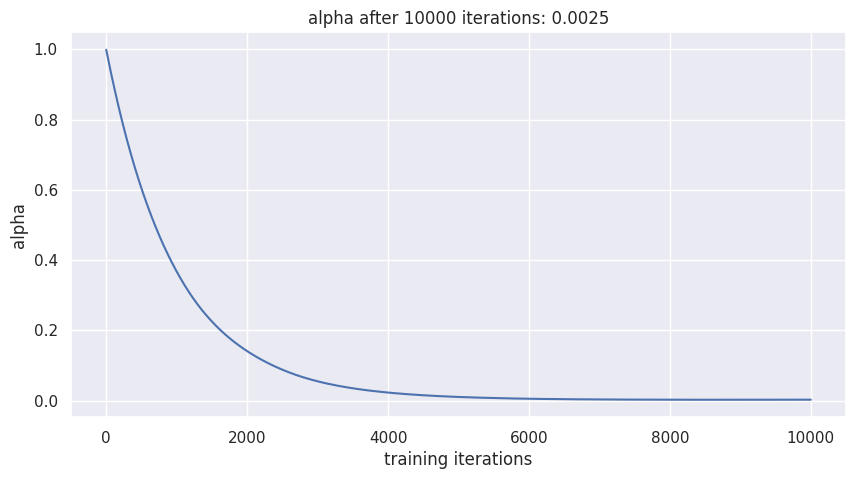

In [23]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
alpha_df = pd.DataFrame({'alpha': alphas[:10000]})
alpha_df = alpha_df.reset_index().rename(columns={'index': 'training iterations'})
ax = sns.lineplot(x='training iterations', y='alpha', data=alpha_df)
ax.set_title(f'alpha after 10000 iterations: {round(alphas[9999], 4)}')
fig = ax.get_figure()
fig.savefig('automatic_alpha_plot')

In [11]:
# winners = np.asarray(stats_dict['winners'])
# losses = np.asarray(stats_dict['losses'])
# stats = np.asarray(stats_dict['stats'])


In [11]:
winners_0 = np.asarray(f_0_dict['winners'])
winners_005 = np.asarray(f_005_dict['winners'])
winners_02 = np.asarray(f_02_dict['winners'])
winners_04 = np.asarray(f_04_dict['winners'])
winners_auto = np.asarray(f_auto_dict['winners'])


In [80]:
def compute_win_ratio(winners):
    winners = np.asarray(winners)
    win_ratio = winners[:, 0] / (winners[:, 0] + winners[:, 1] + winners[:, 2])
    return win_ratio

In [ ]:
win_ratio_0 = compute_win_ratio(winners_0)
win_ratio_005 = compute_win_ratio(winners_005)
win_ratio_02 = compute_win_ratio(winners_02)
win_ratio_04 = compute_win_ratio(winners_04)
win_ratio_auto = compute_win_ratio(winners_auto)

In [14]:
winner_df = pd.DataFrame({'alpha=0': win_ratio_0, 'alpha=0.05': win_ratio_005, 
                          'alpha=0.2': win_ratio_02, 'alpha=0.4': win_ratio_04,
                          'alpha=auto': win_ratio_auto})
winner_df = winner_df.reset_index()
winner_df = winner_df.rename(columns={'index': 'episodes'})
winner_df['episodes'] = winner_df['episodes'] * 500
winner_df

,episodes,alpha=0,alpha=0.05,alpha=0.2,alpha=0.4,alpha=auto
0,0,0.214,0.114,0.152,0.228,0.200
1,500,0.284,0.286,0.320,0.292,0.372
2,1000,0.460,0.264,0.382,0.302,0.406
3,1500,0.468,0.360,0.324,0.334,0.506
4,2000,0.732,0.374,0.364,0.328,0.506
5,2500,0.740,0.350,0.342,0.368,0.506
6,3000,0.832,0.348,0.380,0.356,0.526
7,3500,0.826,0.346,0.348,0.362,0.582
8,4000,0.892,0.380,0.396,0.322,0.594
9,4500,0.938,0.378,0.404,0.346,0.710


In [15]:
winner_df = winner_df.melt(id_vars=['episodes'], var_name='alpha', value_name='win_ratio')
winner_df

,episodes,alpha,win_ratio
0,0,alpha=0,0.214
1,500,alpha=0,0.284
2,1000,alpha=0,0.460
3,1500,alpha=0,0.468
4,2000,alpha=0,0.732
...,...,...,...
245,22500,alpha=auto,0.966
246,23000,alpha=auto,0.954
247,23500,alpha=auto,0.962
248,24000,alpha=auto,0.950


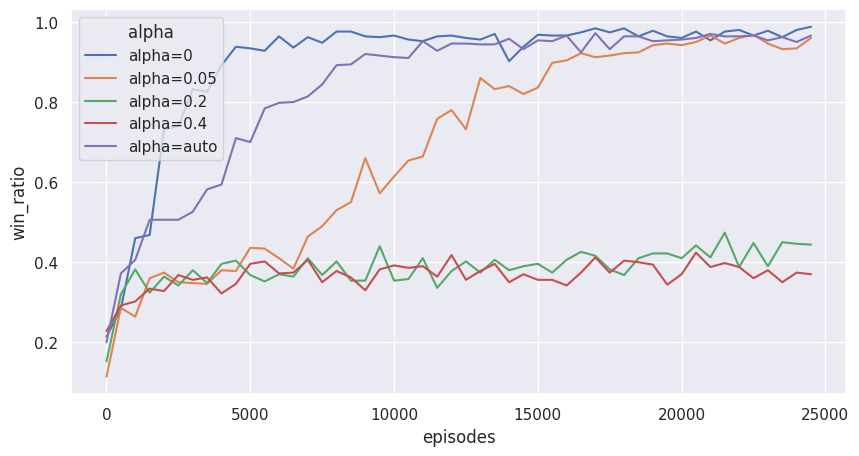

In [19]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='alpha', data=winner_df)
fig = ax.get_figure()
fig.savefig('different_alphas_plot')

## Performance against Basic Opponent

In [3]:
f_auto_strong = 'stats/sac_checkpoint_hockey_normal_et=True_a=0.0014_weak=False_e=25000_r=6.0621.pkl'
f_005_strong = 'stats/sac_checkpoint_hockey_normal_et=False_a=0.05_weak=False_e=25000_r=4.928.pkl'
f_auto_weak = 'stats/sac_checkpoint_hockey_normal_et=True_a=0.0014_weak=True_e=25000_r=8.265.pkl'
f_005_weak = 'stats/sac_checkpoint_hockey_normal_et=False_a=0.05_weak=True_e=25000_r=8.586.pkl'
with open(f_auto_strong, 'rb') as f:
    auto_dict_strong = pickle.load(f)
with open(f_005_strong, 'rb') as f:
    alpha_dict_strong = pickle.load(f)
with open(f_auto_weak, 'rb') as f:
    auto_dict_weak = pickle.load(f)
with open(f_005_weak, 'rb') as f:
    alpha_dict_weak = pickle.load(f)

In [4]:
winners_alpha_strong = np.asarray(alpha_dict_strong['winners'])
winners_auto_strong = np.asarray(auto_dict_strong['winners'])
winners_alpha_weak = np.asarray(alpha_dict_weak['winners'])
winners_auto_weak = np.asarray(auto_dict_weak['winners'])
win_ratio_alpha_strong = compute_win_ratio(winners_alpha_strong)
win_ratio_auto_strong = compute_win_ratio(winners_auto_strong)
win_ratio_alpha_weak = compute_win_ratio(winners_alpha_weak)
win_ratio_auto_weak = compute_win_ratio(winners_auto_weak)

NameError: name 'compute_win_ratio' is not defined

In [ ]:
# append stats of weak and strong opponent
win_ratio_alpha = np.append(win_ratio_alpha_weak, win_ratio_alpha_strong)
win_ratio_auto = np.append(win_ratio_auto_weak, win_ratio_auto_strong)

In [ ]:
winner_df = pd.DataFrame({'alpha=auto': win_ratio_auto, 'alpha=0.05': win_ratio_alpha})
winner_df = winner_df.reset_index()
winner_df = winner_df.rename(columns={'index': 'episodes'})
winner_df['episodes'] = winner_df['episodes'] * 500
winner_df = winner_df.melt(id_vars=['episodes'], var_name='alpha', value_name='win_ratio')
winner_df.head()

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='alpha', data=winner_df)
# ax.set_xticks([0, 25000], labels=['Weak Opponent', 'Strong Opponent'])
ax.vlines(25000, 0, 1, 'g', linestyles='dashed')
font = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 12,
        }

ax.text(28000, 0.18, 'Strong Opponent', fontdict=font)
ax.text(12500, 0.18, 'Weak Opponent', fontdict=font)

fig = ax.get_figure()

fig.savefig('figures/basic_opponent_plot')

In [5]:
from eval_model import eval_agent
from soft_actor_critic import SacAgent
import laserhockey.hockey_env as h_env

In [96]:
env = h_env.HockeyEnv()
ac_space = env.action_space
o_space = env.observation_space

agent_auto = SacAgent(observation_space=o_space, action_space=ac_space, automatic_entropy_tuning=True)
agent_alpha = SacAgent(observation_space=o_space, action_space=ac_space, automatic_entropy_tuning=False)

# path_auto = 'checkpoints/sac_checkpoint_hockey_normal_et=True_a=0.0014_weak=False_e=25000_r=6.0621'
path_auto = 'checkpoints/sac_checkpoint_hockey_selfplay_e=3000_a=0.0014'
# path_alpha = 'checkpoints/sac_checkpoint_hockey_normal_et=False_a=0.05_weak=False_e=25000_r=4.928'
path_alpha = 'checkpoints/sac_checkpoint_hockey_selfplay_e=3000_a=0.05'
basic_weak_opponent = h_env.BasicOpponent(weak=True)
basic_strong_opponent = h_env.BasicOpponent(weak=False)

# load model parameters
agent_auto.load_checkpoint(path_auto, load_buffer=False)
agent_alpha.load_checkpoint(path_alpha, load_buffer=False)
print(agent_auto.train_log)
print(agent_alpha.train_log)

cpu
cpu
alpha tensor(0.0500)
Loading models from checkpoints/sac_checkpoint_hockey_selfplay_e=3000_a=0.0014
Loading models from checkpoints/sac_checkpoint_hockey_selfplay_e=3000_a=0.05
['Trained in mode defense with weak=False opponent for 15000 episodes, mean reward: 5.1314449919318585', 'Trained in mode normal with weak=True opponent for 25000 episodes, mean reward: 8.264968570386724', 'Trained in mode normal with weak=False opponent for 25000 episodes, mean reward: 6.0621432081315065', 'Trained against self for 3000 episodes', 'Trained against self for 3000 episodes', 'Trained against self for 3000 episodes', 'Trained against self for 3000 episodes', 'Trained against self for 3000 episodes']
['Trained in mode defense with weak=False opponent for 25000 episodes, mean reward: 5.360517365816166', 'Trained in mode normal with weak=True opponent for 25000 episodes, mean reward: 8.586039176494161', 'Trained in mode normal with weak=False opponent for 25000 episodes, mean reward: 4.9280012

In [97]:
eval_episodes = 500
# eval in defense mode
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
winner_defense_auto = eval_agent(agent_auto, None, env, episodes=eval_episodes, render=False)
winner_defense_alpha = eval_agent(agent_alpha, None, env, episodes=eval_episodes, render=False)

Agent won 139 games, lost 199 games, draw 162 games
Win/Loss+Win Ratio 0.41124260355029585
Average reward over 500 episodes: -4.716033791049255
Agent won 83 games, lost 216 games, draw 201 games
Win/Loss+Win Ratio 0.27759197324414714
Average reward over 500 episodes: -6.099961311282853


In [98]:
# eval in shooting mode
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
winner_shooting_auto = eval_agent(agent_auto, None, env, episodes=eval_episodes, render=False)
winner_shooting_alpha = eval_agent(agent_alpha, None, env, episodes=eval_episodes, render=False)

Agent won 217 games, lost 27 games, draw 256 games
Win/Loss+Win Ratio 0.889344262295082
Average reward over 500 episodes: -2.828986928757446
Agent won 162 games, lost 46 games, draw 292 games
Win/Loss+Win Ratio 0.7788461538461539
Average reward over 500 episodes: -5.078889973218674


In [99]:
# eval against weak opponent
env = h_env.HockeyEnv()
winner_weak_auto = eval_agent(agent_auto, basic_weak_opponent, env, episodes=eval_episodes, render=False)
winner_weak_alpha = eval_agent(agent_alpha, basic_weak_opponent, env, episodes=eval_episodes, render=False)

Agent won 212 games, lost 71 games, draw 217 games
Win/Loss+Win Ratio 0.7491166077738516
Average reward over 500 episodes: 0.7244702391921752
Agent won 172 games, lost 222 games, draw 106 games
Win/Loss+Win Ratio 0.4365482233502538
Average reward over 500 episodes: -3.676652758729362


In [100]:
# eval against strong opponent
env = h_env.HockeyEnv()
winner_strong_auto = eval_agent(agent_auto, basic_strong_opponent, env, episodes=eval_episodes, render=False)
winner_strong_alpha = eval_agent(agent_alpha, basic_strong_opponent, env, episodes=eval_episodes, render=False)

Agent won 133 games, lost 246 games, draw 121 games
Win/Loss+Win Ratio 0.35092348284960423
Average reward over 500 episodes: -5.863447210744871
Agent won 197 games, lost 172 games, draw 131 games
Win/Loss+Win Ratio 0.5338753387533876
Average reward over 500 episodes: -2.84026559870423


In [101]:
# adjusted function
def compute_win_ratio_2(winners):
    winners = np.asarray(winners)
    win_ratio = winners[0] / (winners[0] + winners[1] + winners[2])
    draw_ratio = winners[2] / (winners[0] + winners[1] + winners[2])
    return win_ratio, draw_ratio

In [102]:
ratio_defense_auto, d_defense_auto = compute_win_ratio_2(winner_defense_auto)
ratio_defense_alpha, d_defense_alpha = compute_win_ratio_2(winner_defense_alpha)
ratio_shooting_auto, d_shooting_auto = compute_win_ratio_2(winner_shooting_auto)
ratio_shooting_alpha, d_shooting_alpha = compute_win_ratio_2(winner_shooting_alpha)
ratio_weak_auto, d_weak_auto = compute_win_ratio_2(winner_weak_auto)
ratio_weak_alpha, d_weak_alpha = compute_win_ratio_2(winner_weak_alpha)
ratio_strong_auto, d_strong_auto = compute_win_ratio_2(winner_strong_auto)
ratio_strong_alpha, d_strong_alpha = compute_win_ratio_2(winner_strong_alpha)

In [103]:
df_eval = pd.DataFrame(columns=['mode', 'alpha','win_ratio', 'draw_ratio'])
df_eval.loc[len(df_eval)] =  ['defense', 'auto', ratio_defense_auto, d_defense_auto]
df_eval.loc[len(df_eval)] =  ['defense', '0.05', ratio_defense_alpha, d_defense_alpha]
df_eval.loc[len(df_eval)] =  ['shooting', 'auto', ratio_shooting_auto, d_shooting_auto]
df_eval.loc[len(df_eval)] =  ['shooting', '0.05', ratio_shooting_alpha, d_shooting_alpha]
df_eval.loc[len(df_eval)] =  ['weak', 'auto', ratio_weak_auto, d_weak_auto]
df_eval.loc[len(df_eval)] =  ['weak', '0.05', ratio_weak_alpha, d_weak_alpha]
df_eval.loc[len(df_eval)] =  ['strong', 'auto', ratio_strong_auto, d_strong_auto]
df_eval.loc[len(df_eval)] =  ['strong', '0.05', ratio_strong_alpha, d_strong_alpha]

df_eval

,mode,alpha,win_ratio,draw_ratio
0,defense,auto,0.278,0.324
1,defense,0.05,0.166,0.402
2,shooting,auto,0.434,0.512
3,shooting,0.05,0.324,0.584
4,weak,auto,0.424,0.434
5,weak,0.05,0.344,0.212
6,strong,auto,0.266,0.242
7,strong,0.05,0.394,0.262


In [104]:
pal = sns.color_palette()
print(pal.as_hex())
pal.as_hex()

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [105]:
# make added column for stacked barplot
df_eval['draw_ratio'] = df_eval['win_ratio'] + df_eval['draw_ratio']

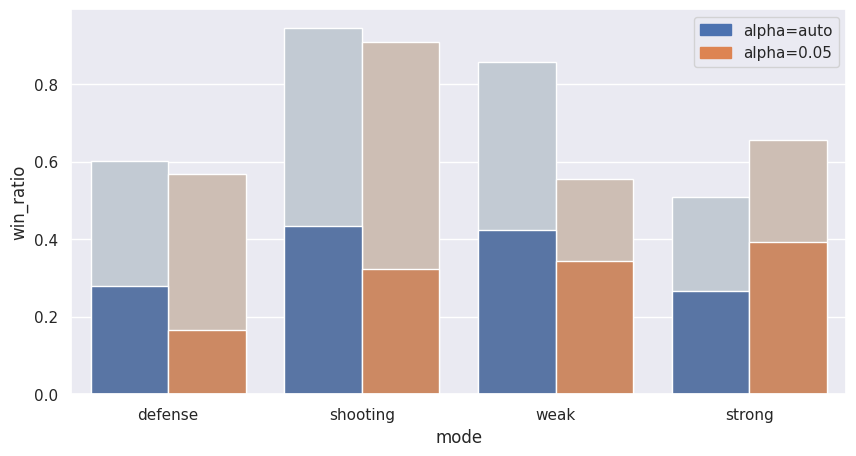

In [106]:
import matplotlib.patches as mpatches

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})

bar1 = sns.barplot(data=df_eval, x="mode", y="draw_ratio", hue="alpha", palette='pastel', saturation=0.2)
bar2 = sns.barplot(data=df_eval, x="mode", y="win_ratio", hue="alpha")

# add legend
top_bar = mpatches.Patch(color='#4c72b0', label='alpha=auto')
bottom_bar = mpatches.Patch(color='#dd8452', label='alpha=0.05')
plt.legend(handles=[top_bar, bottom_bar])
fig = bar2.get_figure()
# fig.savefig('figures/comparison_plot')
plt.show()

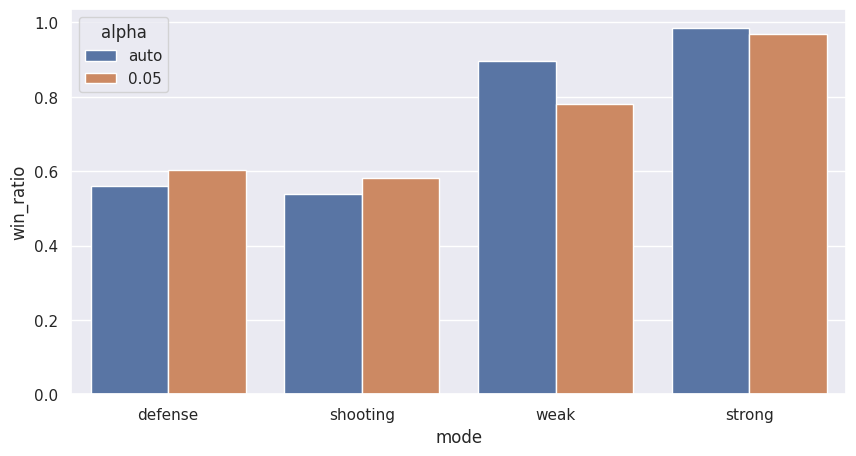

In [135]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})

ax = sns.barplot(data=df_eval, x="mode", y="win_ratio", hue="alpha")
fig = ax.get_figure()

fig.savefig('figures/comparison_plot')

## Training against self

In [137]:
file_alpha = 'stats/sac_checkpoint_hockey_selfplay_e=3000_a=0.05.pkl'
file_auto = 'stats/sac_checkpoint_hockey_selfplay_e=3000_a=0.0014.pkl'
with open(file_alpha, 'rb') as f:
    alpha_dict = pickle.load(f)
with open(file_auto, 'rb') as f:
    auto_dict = pickle.load(f)

dict_keys(['losses', 'stats', 'winners', 'winners_weak', 'winners_strong'])

In [138]:
winners_alpha = np.asarray(alpha_dict['winners'])
winners_weak_alpha = np.asarray(alpha_dict['winners_weak'])
winners_strong_alpha = np.asarray(alpha_dict['winners_strong'])

winners_auto = np.asarray(auto_dict['winners'])
winners_weak_auto = np.asarray(auto_dict['winners_weak'])
winners_strong_auto = np.asarray(auto_dict['winners_strong'])

In [139]:
win_ratio_self_alpha = compute_win_ratio(winners_alpha)
win_ratio_weak_alpha =  compute_win_ratio(winners_weak_alpha)
win_ratio_strong_alpha =  compute_win_ratio(winners_strong_alpha)

win_ratio_self_auto = compute_win_ratio(winners_auto)
win_ratio_weak_auto =  compute_win_ratio(winners_weak_auto)
win_ratio_strong_auto =  compute_win_ratio(winners_strong_auto)

In [145]:
df_alpha = pd.DataFrame({'self': win_ratio_self_alpha, 'weak': win_ratio_weak_alpha,
                        'strong': win_ratio_strong_alpha})
df_auto = pd.DataFrame({'self': win_ratio_self_auto, 'weak': win_ratio_weak_auto,
                        'strong': win_ratio_strong_auto}) 

In [146]:
n_updates=5
eval_interval=500
episodes_per_update=3000
episodes = []
for i in range(n_updates):
    for j in range(0, episodes_per_update+eval_interval, eval_interval):
        episodes.append(j + (i*episodes_per_update))
        if j==0 and i !=0:
            episodes[-1] +=0.01
            
episodes = np.asarray(episodes).astype('float')
episodes

array([    0.  ,   500.  ,  1000.  ,  1500.  ,  2000.  ,  2500.  ,
        3000.  ,  3000.01,  3500.  ,  4000.  ,  4500.  ,  5000.  ,
        5500.  ,  6000.  ,  6000.01,  6500.  ,  7000.  ,  7500.  ,
        8000.  ,  8500.  ,  9000.  ,  9000.01,  9500.  , 10000.  ,
       10500.  , 11000.  , 11500.  , 12000.  , 12000.01, 12500.  ,
       13000.  , 13500.  , 14000.  , 14500.  , 15000.  ])

In [148]:
df_alpha['episodes'] = episodes
df_auto['episodes'] = episodes
df_alpha = df_alpha.melt(id_vars=['episodes'], var_name='opponent', value_name='win_ratio')
df_auto = df_auto.melt(id_vars=['episodes'], var_name='opponent', value_name='win_ratio')


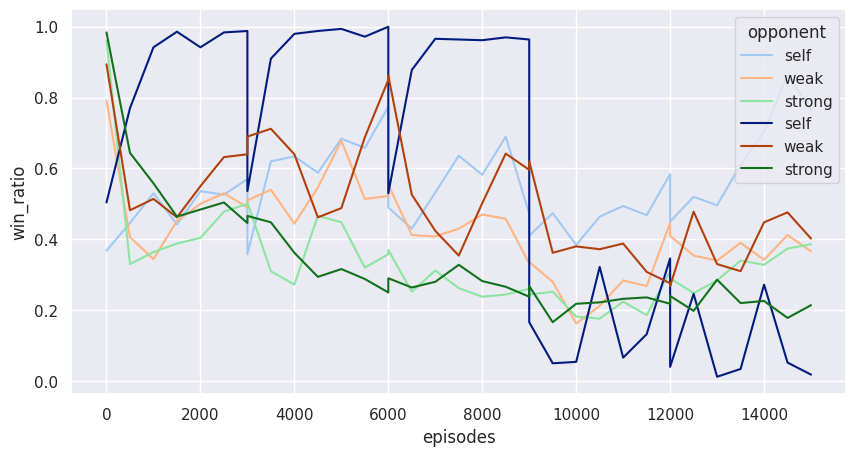

In [150]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.lineplot(x='episodes', y='win_ratio', hue='opponent', data=df_alpha, palette='pastel')
ax = sns.lineplot(x='episodes', y='win_ratio', hue='opponent', data=df_auto, palette='dark')

In [134]:
df_basic = pd.DataFrame({'win_ratio_basic': win_ratio_basic})
df_basic = df_basic.reset_index()
df_basic = df_basic.rename(columns={'index': 'episodes'})
df_basic['episodes'] = df_basic['episodes'] * 2500
df_basic

NameError: name 'win_ratio_basic' is not defined

In [ ]:
sns.lineplot(x='episodes', y='win_ratio_basic', data=df_basic, ax=ax)
